In [13]:
!pip install pandas-ta
!pip install yfinance

     |████████████████████████████████| 59 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 502 kB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 33.4 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 40.2 MB/s eta 0:00:01
  Using cached lxml-4.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (7.1 MB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 

In [44]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

#Alpha vantage

2OQT6WT9WH45WTK5

In [71]:
#df = yf.download(tickers = 'TSLA', start = '2022-03-11',end = '2023-03-11')
tickers = yf.Tickers('TSLA')

# access each ticker using (example)

data = tickers.tickers['TSLA'].history(period="4y")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-28 00:00:00-04:00,18.477333,18.688667,18.340000,18.574667,101611500,0.0,0.0
2019-03-29 00:00:00-04:00,18.580000,18.677334,18.299999,18.657333,89869500,0.0,0.0
2019-04-01 00:00:00-04:00,18.841333,19.280001,18.752001,19.278667,121656000,0.0,0.0
2019-04-02 00:00:00-04:00,19.219999,19.296000,18.925333,19.058666,82183500,0.0,0.0
2019-04-03 00:00:00-04:00,19.154667,19.744667,19.144667,19.454000,118791000,0.0,0.0


In [67]:
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['TargetNextClose'] = data['Close'].shift(-1)
data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Close'].shift(-1)

data.iloc[:, 0:-1].dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Date'], axis=1, inplace=True)

In [69]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

original = data_set.copy()
data_set.tail(20)

#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

In [51]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[1.19302515e-03 1.32520675e-03 9.50530507e-04 ... 0.00000000e+00
  0.00000000e+00 2.91286827e-04]
 [0.00000000e+00 3.91459352e-04 1.22931448e-04 ... 3.03824997e-04
  2.30039033e-04 2.75864606e-04]
 [1.70663763e-05 4.27046566e-04 6.47538691e-04 ... 6.01243743e-04
  4.56760157e-04 0.00000000e+00]
 ...
 [4.56814678e-01 4.56436824e-01 4.42365832e-01 ... 5.63619252e-01
  6.26771892e-01 4.40350296e-01]
 [4.46471682e-01 4.53005169e-01 4.36392563e-01 ... 5.63888159e-01
  6.26434031e-01 4.35698335e-01]
 [4.37229568e-01 4.35338590e-01 4.32496958e-01 ... 5.64034127e-01
  6.26018891e-01 4.39296526e-01]]


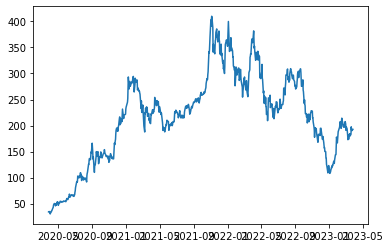

In [52]:
plt.plot(df["Close"])

In [60]:
scaler.inverse_transform(df1[1].reshape(-1, 1))

array([[158.93]])

In [54]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
#print(y)
print(y.shape)

857
(827, 30, 8)
(827, 1)


In [56]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

661
(661, 30, 8)
(166, 30, 8)
(661, 1)
(166, 1)


In [60]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=200, shuffle=True, validation_split = 0.1)

Epoch 1/200
40/40 [==============================] - 2s 18ms/step - loss: 0.0206 - val_loss: 0.0036
Epoch 2/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 3/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 4/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 5/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 6/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 7/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 8/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 9/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 10/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0019

40/40 [==============================] - 1s 14ms/step - loss: 9.3460e-04 - val_loss: 0.0018
Epoch 82/200
40/40 [==============================] - 1s 14ms/step - loss: 8.9441e-04 - val_loss: 0.0018
Epoch 83/200
40/40 [==============================] - 1s 15ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 84/200
40/40 [==============================] - 1s 14ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 85/200
40/40 [==============================] - 1s 15ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 86/200
40/40 [==============================] - 1s 15ms/step - loss: 8.3239e-04 - val_loss: 0.0020
Epoch 87/200
40/40 [==============================] - 1s 17ms/step - loss: 8.8079e-04 - val_loss: 0.0019
Epoch 88/200
40/40 [==============================] - 1s 14ms/step - loss: 8.5116e-04 - val_loss: 0.0019
Epoch 89/200
40/40 [==============================] - 1s 14ms/step - loss: 8.2623e-04 - val_loss: 0.0019
Epoch 90/200
40/40 [==============================] - 1s 19ms/step - loss: 8.508

40/40 [==============================] - 1s 16ms/step - loss: 7.3760e-04 - val_loss: 0.0022
Epoch 159/200
40/40 [==============================] - 1s 15ms/step - loss: 7.6486e-04 - val_loss: 0.0023
Epoch 160/200
40/40 [==============================] - 1s 15ms/step - loss: 9.6867e-04 - val_loss: 0.0023
Epoch 161/200
40/40 [==============================] - 1s 14ms/step - loss: 8.7625e-04 - val_loss: 0.0034
Epoch 162/200
40/40 [==============================] - 1s 14ms/step - loss: 7.7988e-04 - val_loss: 0.0019
Epoch 163/200
40/40 [==============================] - 1s 14ms/step - loss: 7.5757e-04 - val_loss: 0.0028
Epoch 164/200
40/40 [==============================] - 1s 14ms/step - loss: 7.2729e-04 - val_loss: 0.0025
Epoch 165/200
40/40 [==============================] - 1s 15ms/step - loss: 7.9152e-04 - val_loss: 0.0029
Epoch 166/200
40/40 [==============================] - 1s 16ms/step - loss: 8.2859e-04 - val_loss: 0.0025
Epoch 167/200
40/40 [==============================] - 1s 16

In [62]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

6/6 [==============================] - 0s 5ms/step
[0.6753315] [0.7100359]
[0.6738801] [0.71036148]
[0.688016] [0.71886866]
[0.69875187] [0.73637136]
[0.72144544] [0.73954977]
[0.76063204] [0.68695602]
[0.787177] [0.6927474]
[0.74422085] [0.67452506]
[0.7321267] [0.70285661]
[0.68703437] [0.68299797]


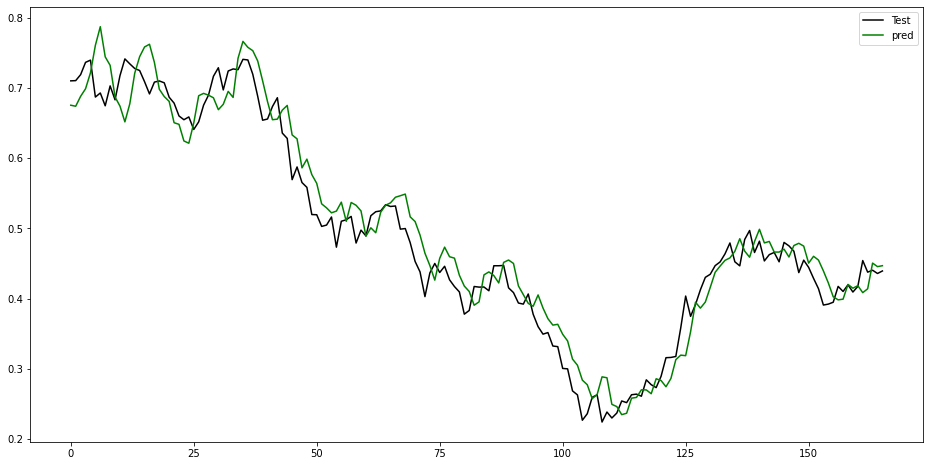

In [63]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()